In [1]:
%config IPCompleter.greedy=True

# ITN outcomes with Pyrethroid resistance
## The following functions are pre-defined in the Imperial Colleage Deterministic Model

motarlity in bioassay - measure of % death in discriminating dose bioassay

motarlity in hut trial

Version 1 Odin model emanator

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# mortality
mortality_range = np.linspace(0,1,100)
mortality_hut_a = 0.6338 + 3.9970 * (mortality_range - 0.5)
mortality_hut = np.exp(mortality_hut_a)/(1 + np.exp(mortality_hut_a))
# deterance
deterance_hut_a = 0.07117 + 1.257 * (mortality_hut - 0.5)- np.square(1.517 * (mortality_hut - 0.5))
deterance_hut = deterance_hut_a.clip(min=0)
successful_hut = 0.02491 * np.exp(3.317 * (1 - mortality_hut))
repeat_hut = 1 - successful_hut - mortality_hut

In [16]:
entrance = 1 - deterance_hut
mortality_hut_with_entrance = entrance * mortality_hut
successful_hut_with_entrance = entrance * successful_hut
repeat_hut_with_entrance = entrance * repeat_hut + deterance_hut


In [19]:
r_ITN0_raw = ( 1 - successful_hut_with_entrance / 0.699 ) * ( repeat_hut_with_entrance / ( mortality_hut_with_entrance + repeat_hut_with_entrance ))


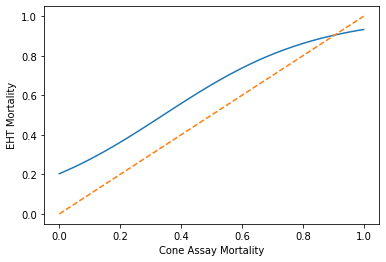

In [4]:
plt.plot(mortality_range, mortality_hut)
plt.plot(mortality_range, mortality_range, '--')
plt.ylabel('EHT Mortality')
plt.xlabel('Cone Assay Mortality')
plt.show()

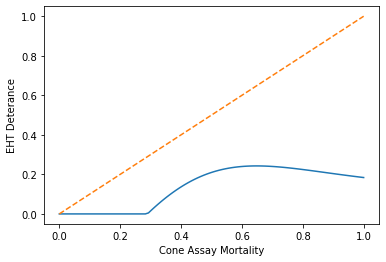

In [8]:
plt.plot(mortality_range, deterance_hut)
plt.plot(mortality_range, mortality_range, '--')
plt.ylabel('EHT Deterance')
plt.xlabel('Cone Assay Mortality')
plt.show()

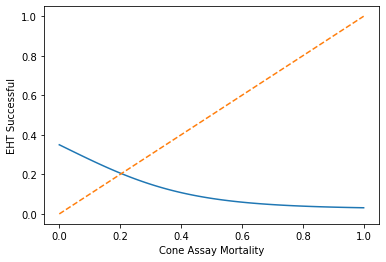

In [9]:
plt.plot(mortality_range, successful_hut)
plt.plot(mortality_range, mortality_range, '--')
plt.ylabel('EHT Successful')
plt.xlabel('Cone Assay Mortality')
plt.show()

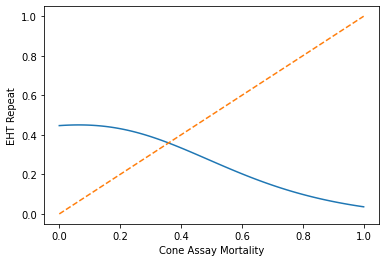

In [10]:
plt.plot(mortality_range, repeat_hut)
plt.plot(mortality_range, mortality_range, '--')
plt.ylabel('EHT Repeat')
plt.xlabel('Cone Assay Mortality')
plt.show()

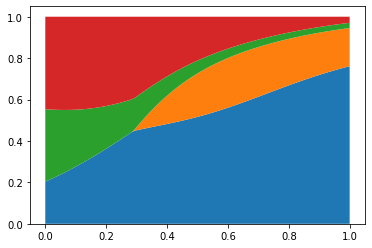

In [18]:
plt.stackplot(mortality_range, mortality_hut_with_entrance,deterance_hut, successful_hut_with_entrance, repeat_hut_with_entrance )